In [1]:
from analysis import *
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np

In [4]:
!pwd

/Users/egeerdogan/Desktop/Simbadt/bitcoin


In [12]:
SIM_NAME = "testing"
SIM_REPS = 5
SIM_ITERS = 30000000

print(SIM_NAME)
for REP in range(SIM_REPS): 
    print(REP)
    location = f'dumps/{SIM_NAME}_{REP}'
    nodes = []
    for filename in os.listdir(os.fsencode(location)):
        filename = filename.decode("utf-8")
        with open(f'{location}/{filename}', 'rb') as f:
            nodes.append(pickle.load(f))
            
    print(f'Loaded {len(nodes)} nodes.')

    blocks = get_all_blocks(nodes)
    print(f'Total blocks:\t{len(blocks)}')

    stale_rates = [stale_block_rate(node) for node in nodes]
    print(f'Stale rate:\t{round(np.mean(stale_rates), 5)}')

    block_ints = [avg_block_interval(node) for node in nodes]
    print(f'Block interval:\t{np.mean(block_ints)} iters')

    delays_50 = [block_percentile_delay(block, nodes, 0.5) for id, block in blocks.items()]
    delays_90 = [block_percentile_delay(block, nodes, 0.9) for id, block in blocks.items()]
    print(f'50% delay:\t{round(np.mean(delays_50), 2)} iters')
    print(f'90% delay:\t{round(np.mean(delays_90), 2)} iters')

    tps = transactions_per_second(blocks.values(), SIM_ITERS / 10)
    print(f'Tx per second:\t{tps}')

testing
0
Loaded 9 nodes.
Total blocks:	5078
Stale rate:	0.00586
Block interval:	5937.834257425742 iters
50% delay:	50.04 iters
90% delay:	77.38 iters
Tx per second:	3.562229573759894
1


FileNotFoundError: [Errno 2] No such file or directory: b'dumps/testing_1'

In [ ]:
chain = get_longest_chain(blocks.)

In [ ]:
mine_regions = [block.miner.region.name for id, block in blocks.items()]
REGIONS = set(mine_regions)
region_counts = dict()

for region in REGIONS:
    region_counts[region] = mine_regions.count(region)

sorted_counts = dict(sorted(region_counts.items(), key=lambda item: item[1], reverse=True))

plt.bar(sorted_counts.keys(), sorted_counts.values())
plt.xlabel('Region')
plt.ylabel('Blocks Mined')
plt.show()

for region, count in sorted_counts.items():
    print(region, round(100*count / sum(sorted_counts.values()), 2), '%')

In [ ]:
for node in nodes:
    print(node.id[-2:], [n[-2:] for n in node.ins])

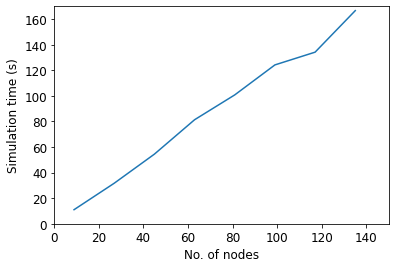

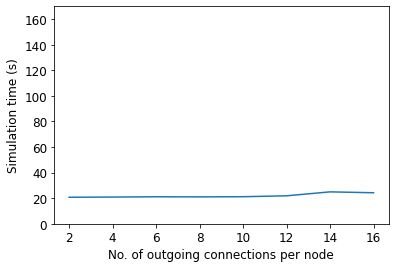

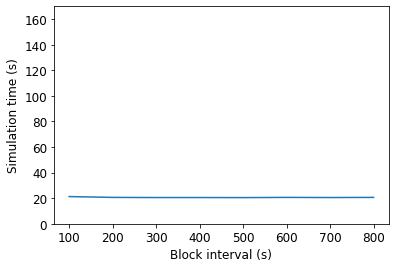

In [2]:
node_counts = [9, 27, 45, 63, 81, 99, 117, 135]
node_times = [11.03, 31.72, 54.46, 81.35, 100.78, 124.23, 134.19, 166.66]

conn_counts = [2, 4, 6, 8, 10, 12, 14, 16]
conn_times = [20.75, 20.90, 21.13, 21.04, 21.18, 21.88, 24.97, 24.27]

block_ints = [100, 200, 300, 400, 500, 600, 700, 800]
block_times = [21.29, 20.64, 20.53, 20.54, 20.48, 20.64, 20.54, 20.64]

font = {'size'   : 12}

plt.rc('font', **font)

plt.figure(figsize=(6,4))
plt.plot(node_counts, node_times)
plt.xlabel('No. of nodes')
plt.ylabel('Simulation time (s)')
plt.xlim(0, 150)
plt.ylim(0,170) 
plt.show()

plt.figure(figsize=(6,4))
plt.plot(conn_counts, conn_times)
plt.xlabel('No. of outgoing connections per node')
plt.ylabel('Simulation time (s)')
plt.ylim(0,170) 
plt.show()

plt.figure(figsize=(6,4))
plt.plot(block_ints, block_times)
plt.xlabel('Block interval (s)')
plt.ylabel('Simulation time (s)')
plt.ylim(0,170) 
plt.show()